In [2]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error


# Configure visuals
%matplotlib inline
sns.set(style="whitegrid")

# Load the CSV file into a DataFrame
df = pd.read_csv("top_insta_influencers_data.csv", encoding='utf-8')


In [3]:
# View the first five rows
df.head()


,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
0,1,cristiano,92,3.3k,475.8m,8.7m,1.39%,6.5m,29.0b,Spain
1,2,kyliejenner,91,6.9k,366.2m,8.3m,1.62%,5.9m,57.4b,United States
2,3,leomessi,90,0.89k,357.3m,6.8m,1.24%,4.4m,6.0b,NaN
3,4,selenagomez,93,1.8k,342.7m,6.2m,0.97%,3.3m,11.5b,United States
4,5,therock,91,6.8k,334.1m,1.9m,0.20%,665.3k,12.5b,United States


In [4]:
# Check data types and missing values
df.info()
df.isna().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   rank               200 non-null    int64 
 1   channel_info       200 non-null    object
 2   influence_score    200 non-null    int64 
 3   posts              200 non-null    object
 4   followers          200 non-null    object
 5   avg_likes          200 non-null    object
 6   60_day_eng_rate    200 non-null    object
 7   new_post_avg_like  200 non-null    object
 8   total_likes        200 non-null    object
 9   country            138 non-null    object
dtypes: int64(2), object(8)
memory usage: 15.8+ KB


rank                  0
channel_info          0
influence_score       0
posts                 0
followers             0
avg_likes             0
60_day_eng_rate       0
new_post_avg_like     0
total_likes           0
country              62
dtype: int64

In [5]:
df.describe()


,rank,influence_score
count,200.000000,200.000000
mean,100.500000,81.820000
std,57.879185,8.878159
min,1.000000,22.000000
25%,50.750000,80.000000
50%,100.500000,84.000000
75%,150.250000,86.000000
max,200.000000,93.000000


In [6]:
df.drop_duplicates(inplace=True)

In [7]:
# Fill missing values: categorical with mode, numerical with median
for column in df.columns:
    if df[column].dtype == 'object':
        # Categorical column: fill NaNs with the most frequent value
        df[column].fillna(df[column].mode().iloc[0], inplace=True)
    else:
        # Numerical column: fill NaNs with the median
        df[column].fillna(df[column].median(), inplace=True)

# Verify that no missing values remain
print(df.isna().sum())


rank                 0
channel_info         0
influence_score      0
posts                0
followers            0
avg_likes            0
60_day_eng_rate      0
new_post_avg_like    0
total_likes          0
country              0
dtype: int64


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17076\2766274327.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].median(), inplace=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17076\2766274327.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

In [8]:
# Display summary statistics for numeric columns 
print(df[['influence_score', 'followers', 'avg_likes', '60_day_eng_rate', 'new_post_avg_like']].describe())

       influence_score
count       200.000000
mean         81.820000
std           8.878159
min          22.000000
25%          80.000000
50%          84.000000
75%          86.000000
max          93.000000


In [9]:
def symbol_to_digit(i):
    i = str(i).replace(",", "").strip().lower()
    if i.endswith("k"):
        i = round(float(i[:-1]) * 1000)
    elif i.endswith("m"):
        i = round(float(i[:-1]) * 1000000)
    elif i.endswith("b"):
        i = round(float(i[:-1]) * 1000000000)
    elif i.endswith("t"):
        i = round(float(i[:-1]) * 1000000000000)

    return i
names = ['posts', 'followers', 'avg_likes', 'new_post_avg_like', 'total_likes']           
for i in names:
    df[i] = df[i].apply(symbol_to_digit)

In [10]:
print(df.isnull().sum())




rank                 0
channel_info         0
influence_score      0
posts                0
followers            0
avg_likes            0
60_day_eng_rate      0
new_post_avg_like    0
total_likes          0
country              0
dtype: int64


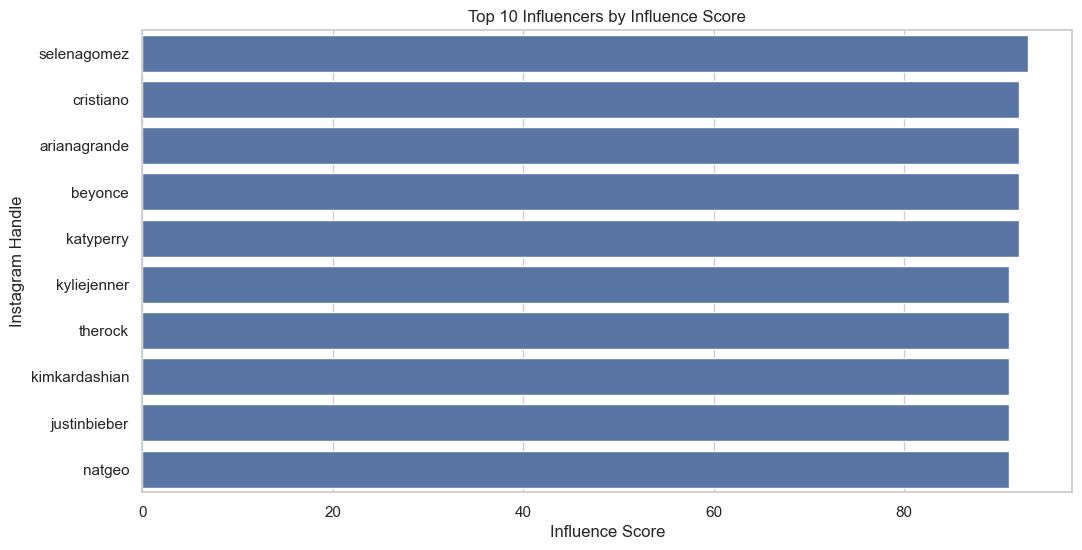

In [11]:

top10_influencers = df.nlargest(10, 'influence_score')
plt.figure(figsize=(12,6))
sns.barplot(x='influence_score', y='channel_info', data=top10_influencers)
plt.title("Top 10 Influencers by Influence Score")
plt.xlabel("Influence Score")
plt.ylabel("Instagram Handle")
plt.show()

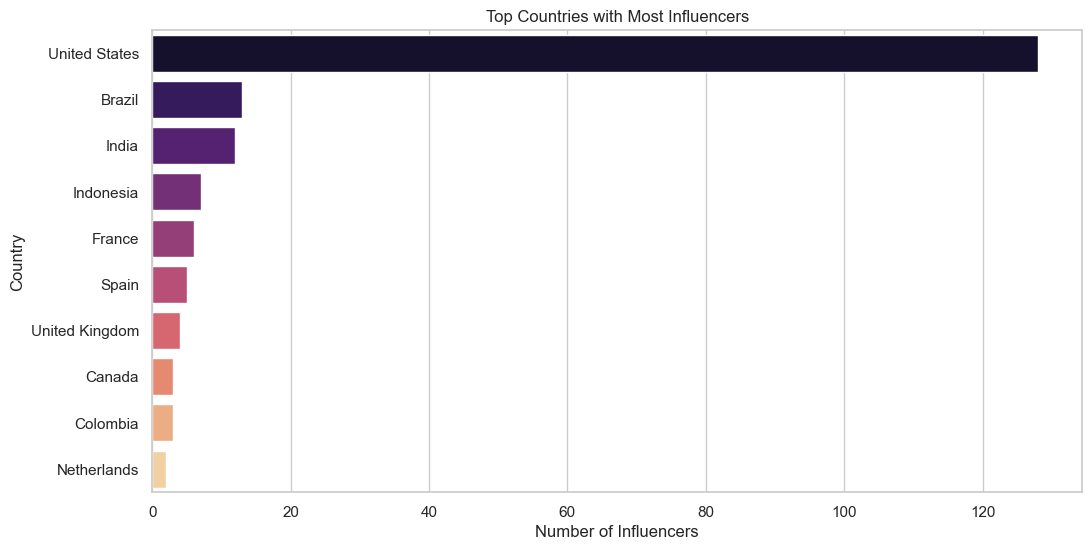

In [12]:
plt.figure(figsize=(12,6))
top_countries = df['country'].value_counts().nlargest(10)
sns.barplot(x=top_countries.values, y=top_countries.index, hue=top_countries.index, palette='magma')
plt.title("Top Countries with Most Influencers")
plt.xlabel("Number of Influencers")
plt.ylabel("Country")
plt.show()

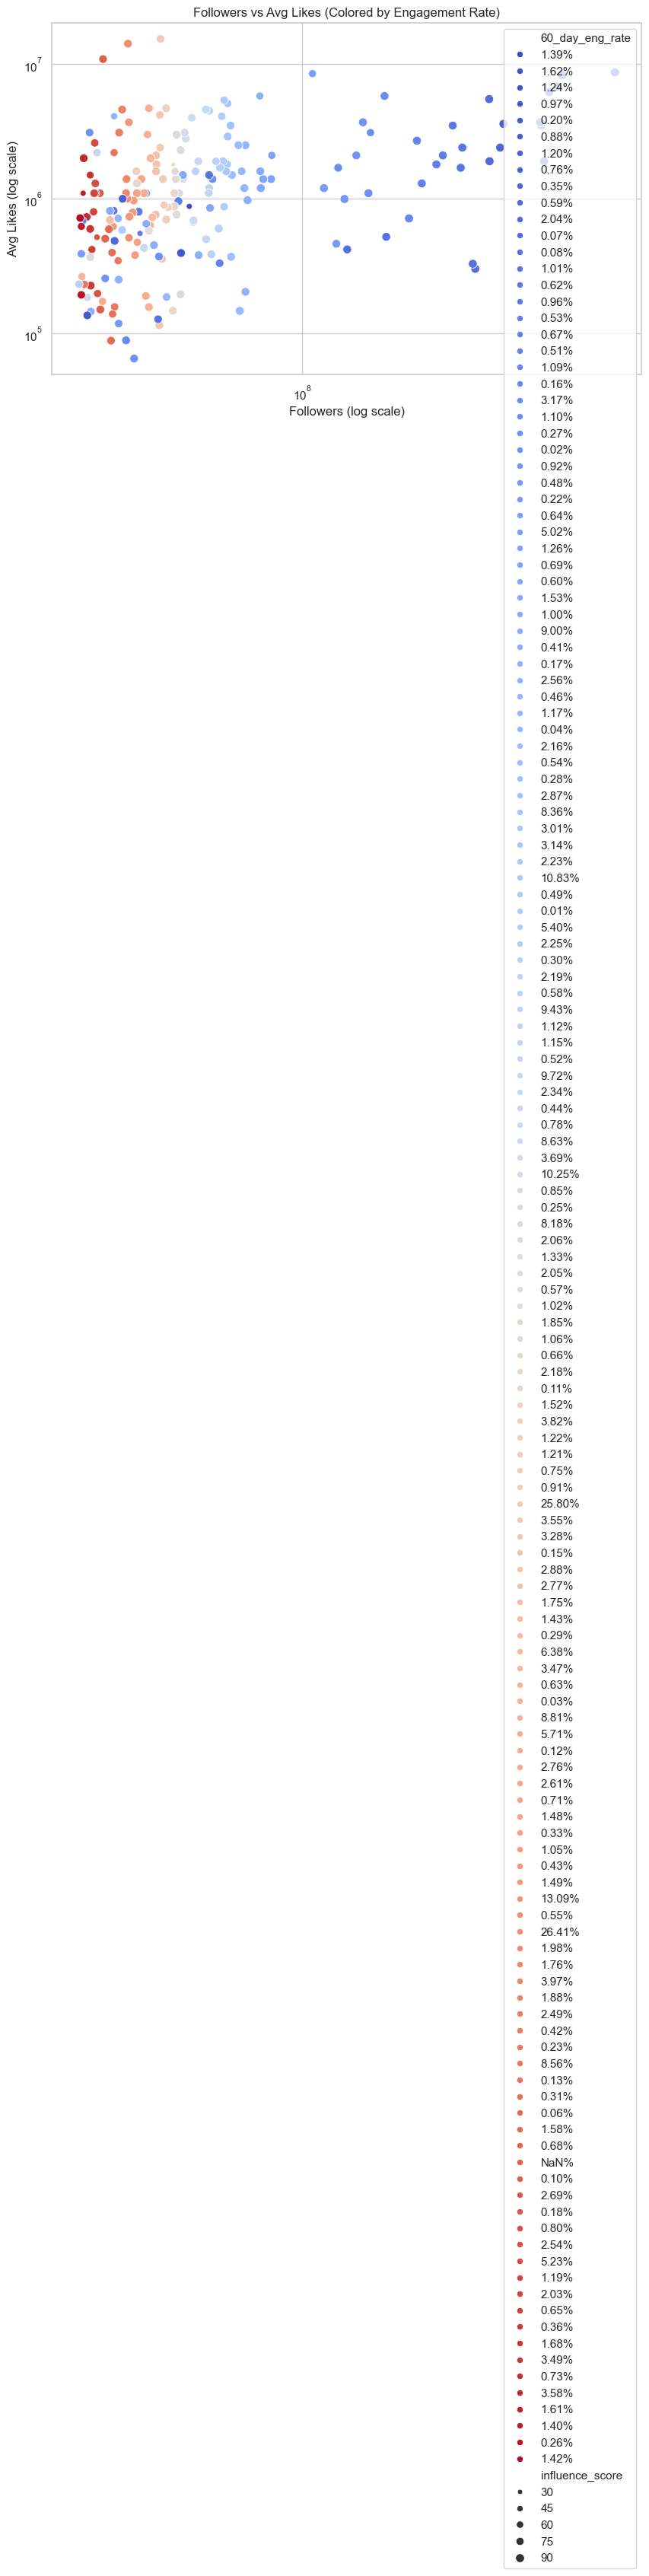

In [13]:
plt.figure(figsize=(10,6))
sns.scatterplot(df, x='followers', y='avg_likes', hue='60_day_eng_rate', palette='coolwarm', size='influence_score')
plt.xscale('log')
plt.yscale('log')
plt.title("Followers vs Avg Likes (Colored by Engagement Rate)")
plt.xlabel("Followers (log scale)")
plt.ylabel("Avg Likes (log scale)")
plt.show()

In [14]:
def parse_number(x):
    if pd.isna(x): return np.nan
    s = str(x).replace(",", "").strip()
    mult = {"k":1e3, "m":1e6, "b":1e9}
    if s[-1].lower() in mult:
        return float(s[:-1]) * mult[s[-1].lower()]
    return float(s)

for c in ["posts","followers","avg_likes","new_post_avg_like","total_likes"]:
    df[c] = df[c].apply(parse_number)

df["60_day_eng_rate"] = (
    df["60_day_eng_rate"]
      .str.rstrip("%")
      .astype(float)
      .divide(100)
)


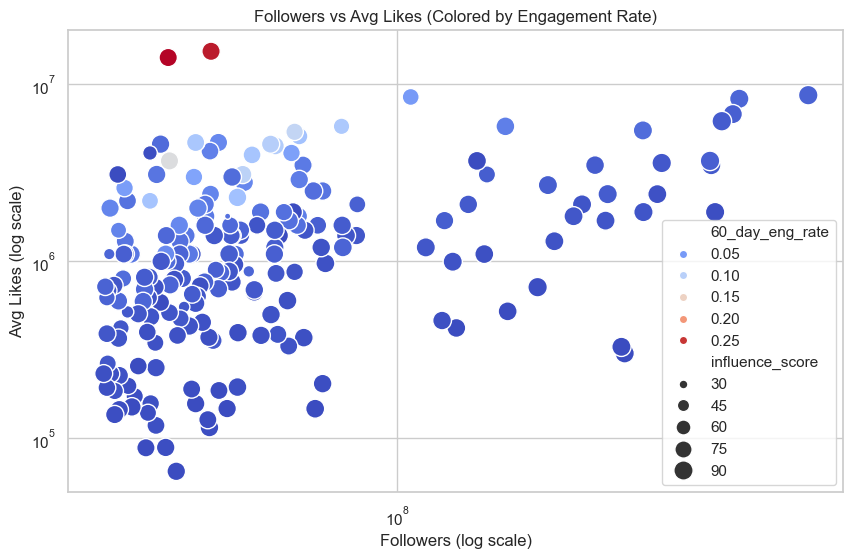

In [15]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df,
    x='followers',
    y='avg_likes',
    hue='60_day_eng_rate',
    palette='coolwarm',
    size='influence_score',
    sizes=(20, 200)
)
plt.xscale('log')
plt.yscale('log')
plt.title("Followers vs Avg Likes (Colored by Engagement Rate)")
plt.xlabel("Followers (log scale)")
plt.ylabel("Avg Likes (log scale)")
plt.show()


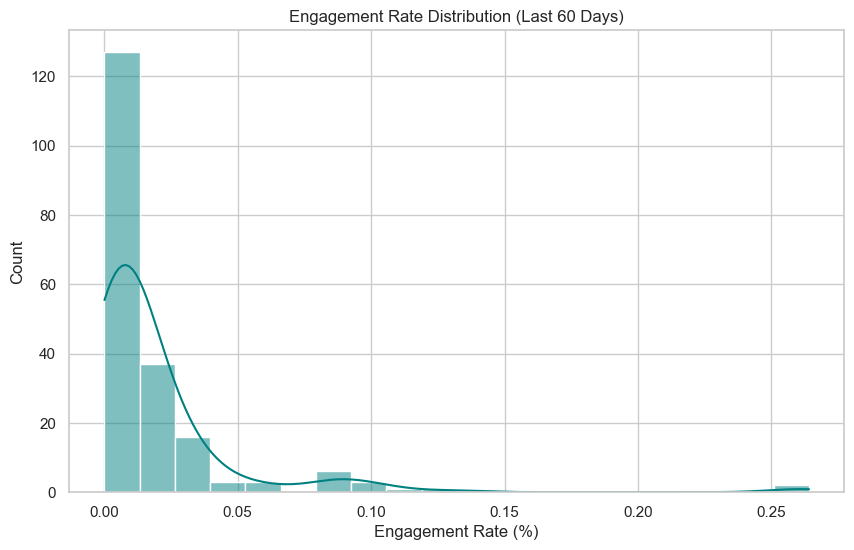

In [16]:

plt.figure(figsize=(10,6))
sns.histplot(df['60_day_eng_rate'], kde=True, bins=20, color='teal')
plt.title("Engagement Rate Distribution (Last 60 Days)")
plt.xlabel("Engagement Rate (%)")
plt.show()

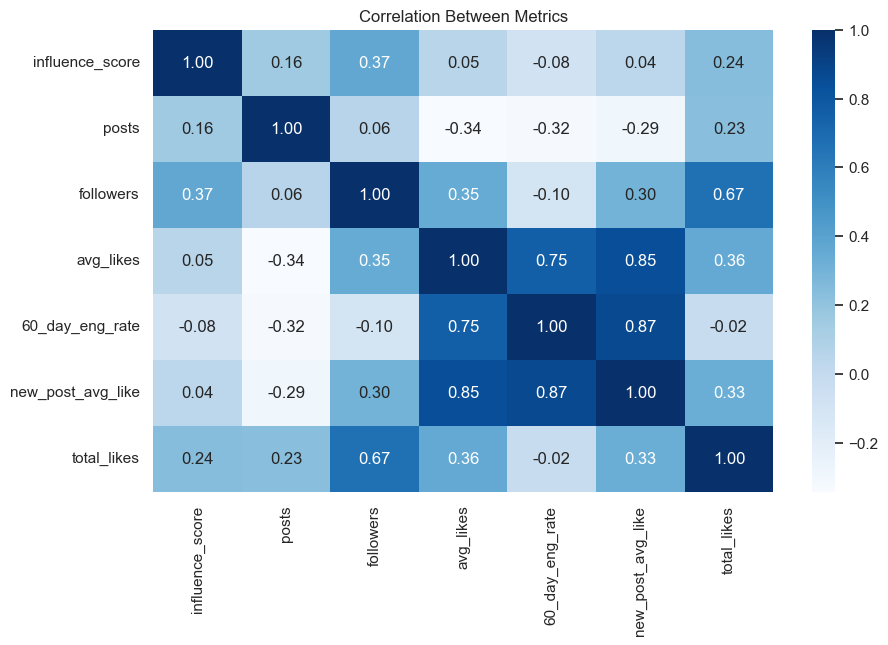

In [17]:
plt.figure(figsize=(10,6))
corr = df[['influence_score','posts','followers','avg_likes','60_day_eng_rate','new_post_avg_like','total_likes']].corr()
sns.heatmap(corr, annot=True, cmap='Blues', fmt=".2f")
plt.title("Correlation Between Metrics")
plt.show()

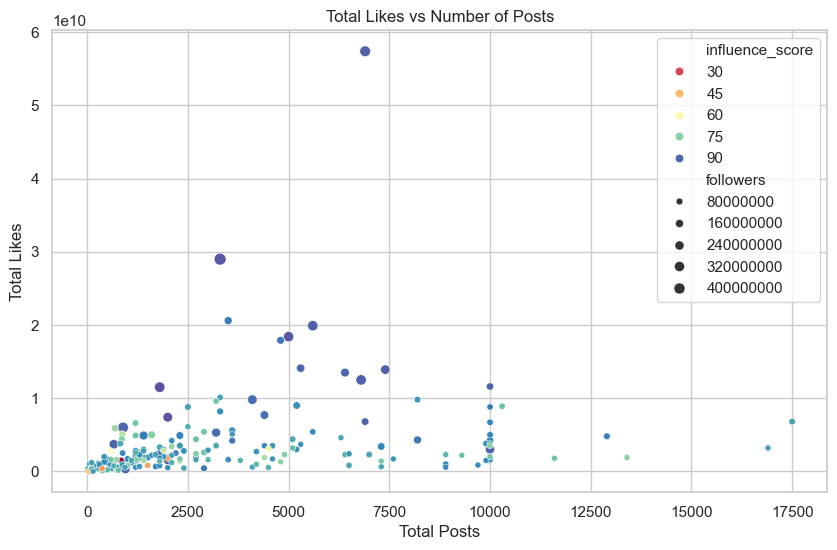

In [18]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='posts', y='total_likes', hue='influence_score', size='followers', palette='Spectral')
plt.title("Total Likes vs Number of Posts")
plt.xlabel("Total Posts")
plt.ylabel("Total Likes")
plt.show()

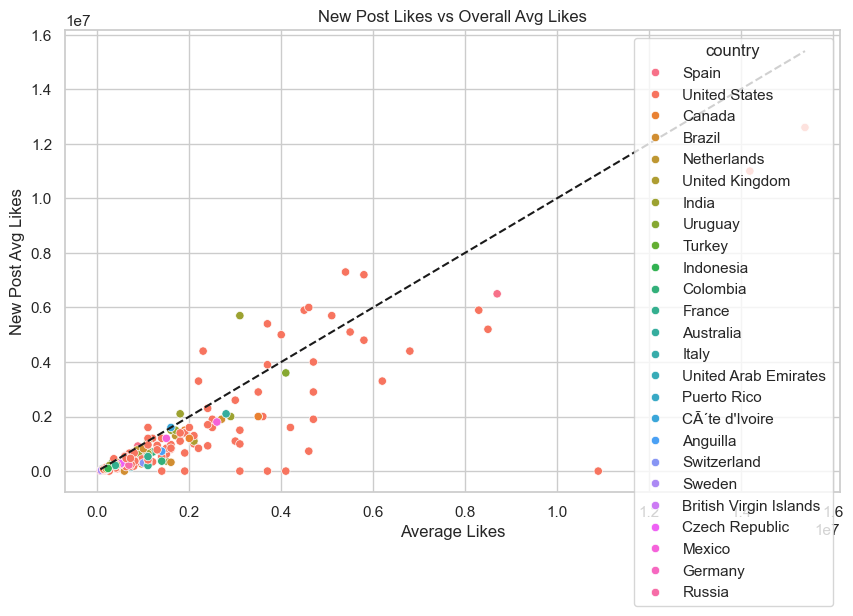

In [19]:

plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='avg_likes', y='new_post_avg_like', hue='country')
plt.plot([df['avg_likes'].min(), df['avg_likes'].max()],
         [df['avg_likes'].min(), df['avg_likes'].max()], 'k--')
plt.title("New Post Likes vs Overall Avg Likes")
plt.xlabel("Average Likes")
plt.ylabel("New Post Avg Likes")
plt.show()

In [20]:
import plotly.express as px
fig = px.bar(df.sort_values('followers', ascending=False).head(10),
             x='channel_info', y='followers',
             title='Top 10 Influencers by Followers', color='country')
fig.show()

In [21]:
print("Correlation between Followers and Avg Likes:", round(df['followers'].corr(df['avg_likes']), 2))
print("Most Represented Country:", df['country'].mode()[0])

df.to_csv('insta.csv')

Correlation between Followers and Avg Likes: 0.35
Most Represented Country: United States


In [22]:
# 5.1 Export to SQLite
conn = sqlite3.connect("influencers.db")
df.to_sql("influencers", conn, if_exists="replace", index=False)

# 5.2 Sample Queries
query1 = """
SELECT country,
       ROUND(AVG(followers)/1e6,2) AS avg_followers_m
FROM influencers
GROUP BY country
ORDER BY avg_followers_m DESC
LIMIT 5;
"""
print(pd.read_sql(query1, conn))


         country  avg_followers_m
0          Spain           147.86
1         Canada           119.33
2  United States            86.53
3    Netherlands            85.40
4        Uruguay            66.90


In [23]:
features = ["followers","avg_likes","posts","new_post_avg_like","total_likes"]
X = df[features]
y = df["60_day_eng_rate"]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42)


In [24]:
df = pd.read_csv("top_insta_influencers_data.csv", encoding="utf-8")

def parse_number(x):
    if pd.isna(x): return np.nan
    s = str(x).replace(",", "").strip()
    m = {"k":1e3,"m":1e6,"b":1e9}
    return float(s[:-1]) * m[s[-1].lower()] if s[-1].lower() in m else float(s)

for col in ["posts","followers","avg_likes","new_post_avg_like","total_likes"]:
    df[col] = df[col].apply(parse_number)

df["60_day_eng_rate"] = df["60_day_eng_rate"].str.rstrip("%").astype(float)/100

#Fill any remaining missing
fill_values = {}
for col in df.columns:
    if df[col].dtype == "object":
        fill_values[col] = df[col].mode()[0]
    else:
        fill_values[col] = df[col].median()

df.fillna(fill_values, inplace=True)


#Define features and target
numeric_features = ["influence_score","posts","followers",
                    "avg_likes","new_post_avg_like","total_likes"]
categorical_features = ["country"]
target = "60_day_eng_rate"

In [25]:
X = df[numeric_features + categorical_features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [26]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor


# Preprocessing transformer
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numeric_features),
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
])

# Model pipelines
ridge_pipe = Pipeline([
    ("prep", preprocessor),
    ("model", Ridge(alpha=1.0))
])

rf_pipe = Pipeline([
    ("prep", preprocessor),
    ("model", RandomForestRegressor(random_state=42))
])


In [27]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "model__n_estimators": [50, 100, 200],
    "model__max_depth": [None, 10, 20],
    "model__min_samples_split": [2, 5]
}

grid_rf = GridSearchCV(
    rf_pipe, param_grid, cv=5, scoring="r2", n_jobs=-1
)
grid_rf.fit(X_train, y_train)

print("Best RF params:", grid_rf.best_params_)


Best RF params: {'model__max_depth': None, 'model__min_samples_split': 2, 'model__n_estimators': 100}


In [28]:
# Ridge
ridge_pipe.fit(X_train, y_train)
y_pred_ridge = ridge_pipe.predict(X_test)
print("Ridge R²:", round(r2_score(y_test, y_pred_ridge),3))
print("Ridge RMSE:", round(np.sqrt(mean_squared_error(y_test, y_pred_ridge)),5))

# Random Forest (tuned)
y_pred_rf = grid_rf.predict(X_test)
print("RF R²:", round(r2_score(y_test, y_pred_rf),3))
print("RF RMSE:", round(np.sqrt(mean_squared_error(y_test, y_pred_rf)),5))


Ridge R²: 0.935
Ridge RMSE: 0.00641
RF R²: 0.925
RF RMSE: 0.00688


In [29]:
# Extract feature names after one-hot encoding
ohe_cols = grid_rf.best_estimator_\
    .named_steps["prep"]\
    .named_transformers_["cat"]\
    .get_feature_names_out(categorical_features)
feature_names = numeric_features + list(ohe_cols)

importances = grid_rf.best_estimator_\
    .named_steps["model"]\
    .feature_importances_

feat_imp = pd.Series(importances, index=feature_names)\
            .sort_values(ascending=False)
print(feat_imp.head(10))


new_post_avg_like         0.532105
avg_likes                 0.182714
posts                     0.132815
followers                 0.083006
influence_score           0.053683
total_likes               0.014351
country_United States     0.000556
country_United Kingdom    0.000477
country_Canada            0.000090
country_Mexico            0.000090
dtype: float64


In [ ]:
Conclusion - Elite Analysis of Top 100 Instagram Influencers
Influence Score Drivers:

Strong positive correlation between followers, avg_likes, and influence_score.
Influencers with consistently high engagement rates in the last 60 days tend to have a higher influence score regardless of follower count.
Engagement Patterns:

The engagement rate distribution is right-skewed; only a handful have truly exceptional engagement (>5%).
Many influencers have declining average likes on newer posts, suggesting algorithm fatigue or audience saturation.
Geographical Spread:

The top countries with the most influencers are the USA, India, and Brazil, showing strong regional social media ecosystems.
Regional influencers still command huge engagement if niche content is targeted well.
Saturation vs Growth:

A noticeable inverse correlation is present in some influencers where high post volume does not necessarily correlate to high engagement or likes.
Consistency and quality > quantity when it comes to sustaining engagement over time.
New Post Performance:

New post average likes are slightly lower than historical averages, indicating evolving algorithmic reach or reduced post freshness.
Overall, this dataset reflects a modern influencer economy that values authenticity, consistent engagement, and regional relevance
over just large follower counts. Influencers who continue to adapt their content to trends and audience behavior retain higher
influence scores and engagement metrics.